In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [16]:
#Create a timestamp for 7 days, 15-minute intervals
date_range = pd.date_range(start="2025-07-01", periods=96*7, freq="15min")

# Set seed for reproducibility
np.random.seed(42)

# Simulate Load (MW) - base + sinusoidal daily pattern + noise
load = 100 + 20 * np.sin(np.linspace(0, 20 * np.pi, len(date_range))) + np.random.normal(0, 5, len(date_range))

# Simulate Solar Generation (MW) - sinusoidal for day/night + noise, clipped at 0 (no negative solar)
solar_gen = 50 * np.sin(np.linspace(0, 14 * np.pi, len(date_range))) + np.random.normal(0, 5, len(date_range))
solar_gen = np.clip(solar_gen, 0, None)

# Simulate Wind Generation (MW) - base + sinusoidal + noise, absolute to avoid negative
wind_gen = 30 + 10 * np.sin(np.linspace(0, 25 * np.pi, len(date_range))) + np.random.normal(0, 5, len(date_range))
wind_gen = np.abs(wind_gen)

# Create DataFrame
df = pd.DataFrame({
    "timestamp": date_range,
    "load_MW": load,
    "solar_MW": solar_gen,
    "wind_MW": wind_gen
})

#Show first 5 rows
df.head()

,timestamp,load_MW,solar_MW,wind_MW
0,2025-07-01 00:00:00,102.483571,0.000000,34.747771
1,2025-07-01 00:15:00,101.178725,1.417819,23.743328
2,2025-07-01 00:30:00,106.962151,0.000000,19.550049
3,2025-07-01 00:45:00,113.159893,5.879782,38.111347
4,2025-07-01 01:00:00,106.146429,7.406915,27.678375


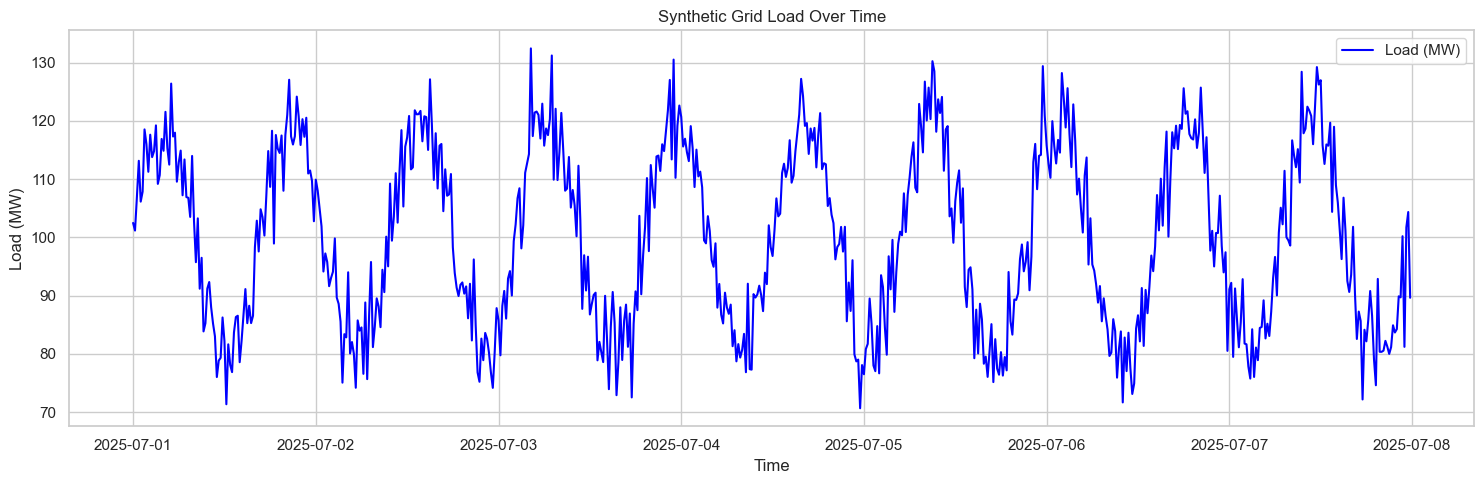

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(df["timestamp"], df["load_MW"], label="Load (MW)", color="blue")
plt.title("Synthetic Grid Load Over Time")
plt.xlabel("Time")
plt.ylabel("Load (MW)")
plt.legend()
plt.tight_layout()
plt.show()

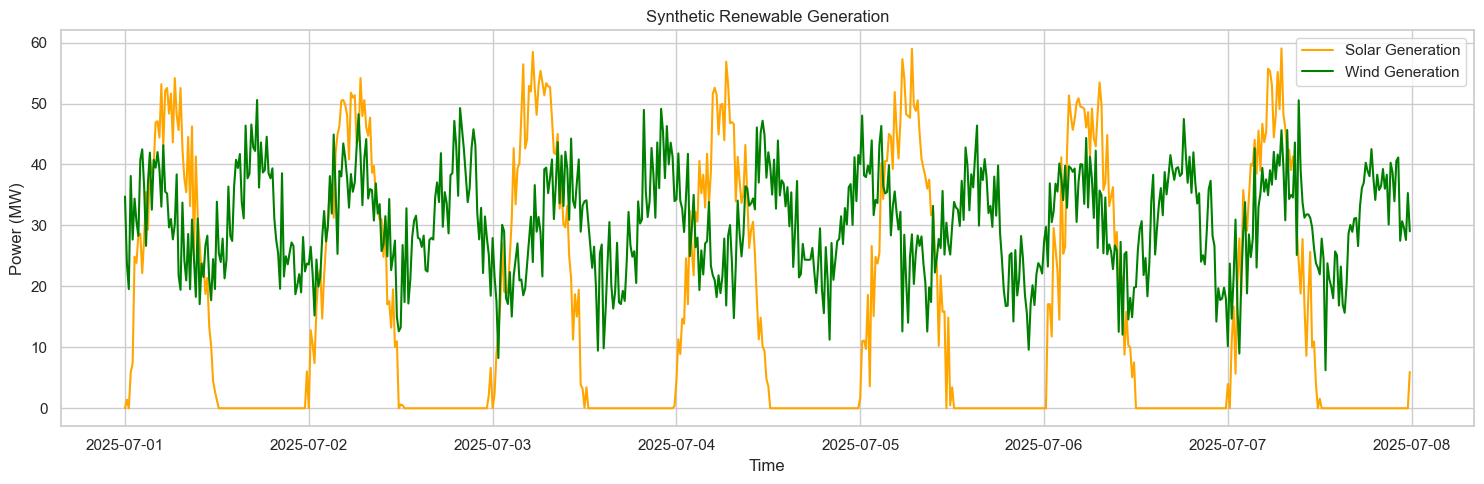

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df["timestamp"], df["solar_MW"], label="Solar Generation", color="orange")
plt.plot(df["timestamp"], df["wind_MW"], label="Wind Generation", color="green")
plt.title("Synthetic Renewable Generation")
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.legend()
plt.tight_layout()
plt.show()

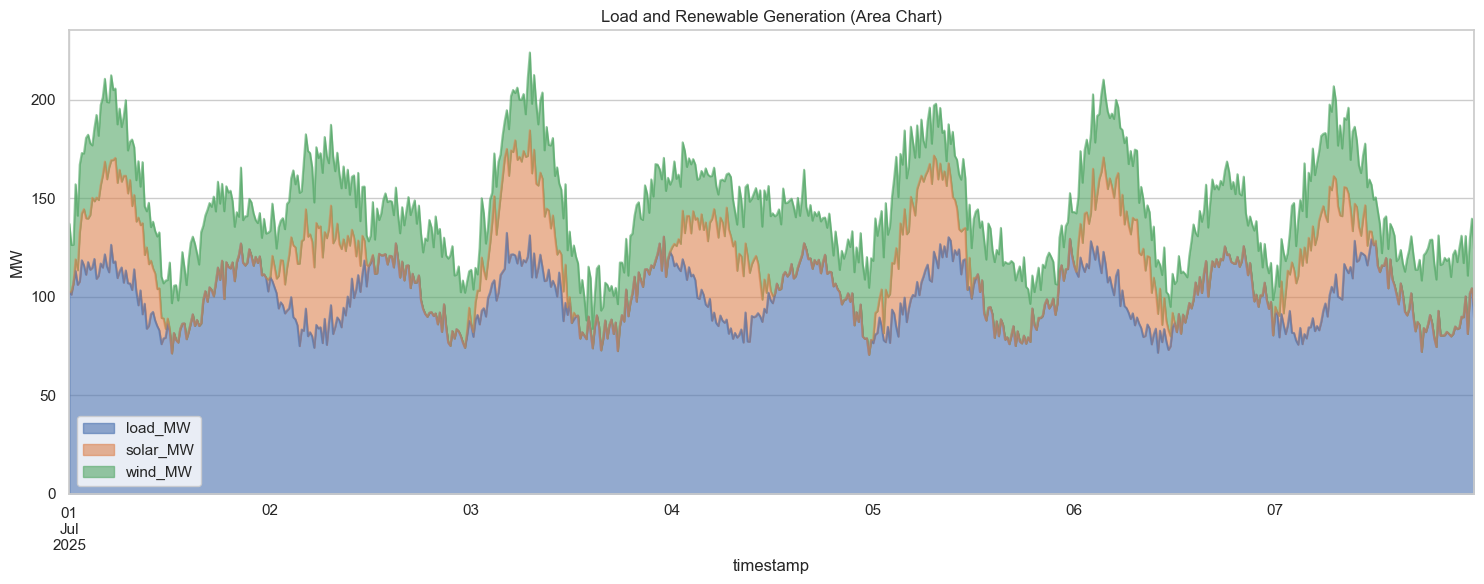

In [19]:
df_plot = df.set_index("timestamp")[["load_MW", "solar_MW", "wind_MW"]]

df_plot.plot.area(figsize=(15, 6), alpha=0.6)
plt.title("Load and Renewable Generation (Area Chart)")
plt.ylabel("MW")
plt.tight_layout()
plt.show()